In [1]:
import os

In [2]:
import torch
num_gpu = torch.cuda.device_count()
print(num_gpu)

2


## Move dataset to the working area as mentioned in yaml file

In [3]:
import shutil

src_dir_path = "/kaggle/input/yolo-labeled/labeled"
des_dir_path = "/kaggle/working/images/"

folder = ['test', 'train', 'valid']

os.makedirs(des_dir_path, exist_ok=True)
for srcf in folder:
    src = src_dir_path+"/"+srcf
    shutil.copytree(src, os.path.join(des_dir_path, srcf))

print("Directories copied successfully!")

Directories copied successfully!


## Install ultralytics

In [4]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

## Create YOLOv8 Model

In [4]:
from ultralytics import YOLO

In [12]:
model = YOLO('yolov8s.pt')

In [23]:
model.train(
    data='/kaggle/input/yolo-labeled/labeled/data.yaml',
    epochs=220,
    lr0=0.005,
    imgsz=640,
    batch=16,
    optimizer='SGD',
    box=6.5,
    cls=1.5,
    mixup=0.4,
    mosaic=0.5,
    flipud=0.5,
    fliplr=0.5,
    # hsv_s=0.1,
    # hsv_h=0.2,
    project='yolo',
    name='v8s',
    exist_ok=True,
    device=[-1,-1]
)

Searching for 2 idle GPUs with >= 20.0% free memory...
Selected idle CUDA devices [1, 0]
Ultralytics 8.3.143 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:1 (Tesla T4, 15095MiB)
                                                        CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=6.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=1.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/yolo-labeled/labeled/data.yaml, degrees=0.0, deterministic=True, device=1,0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=220, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.2, hsv_s=0.1, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.4, mode=train, model=yolov8s.pt, momentum=0.937, mo

train: Scanning /kaggle/working/images/train/labels.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 973.5±869.2 MB/s, size: 115.9 KB)


val: Scanning /kaggle/working/images/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to yolo/v8s/labels.jpg... 
optimizer: SGD(lr=0.005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolo/v8s
Starting training for 220 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/220      1.99G      1.438      12.76      1.869          5        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]


                   all         30         76     0.0681      0.179     0.0488     0.0243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/220       2.4G      1.294      9.521      1.736          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         30         76      0.265      0.354      0.247      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/220       2.4G      1.379      8.178      1.849          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


                   all         30         76      0.525      0.473      0.484      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/220      2.42G      1.161      6.468       1.71          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


                   all         30         76      0.571      0.482      0.458      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/220      2.42G      1.175      5.947      1.656          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]


                   all         30         76      0.627      0.499      0.578      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/220      2.44G      1.175       5.43      1.696          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


                   all         30         76      0.551      0.575      0.571      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/220      2.44G      1.103      5.281      1.615          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]


                   all         30         76      0.427      0.667      0.548      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/220      2.44G      1.002      4.478      1.496          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]


                   all         30         76      0.532      0.333      0.441      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/220      2.44G      1.028      4.966      1.502          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]


                   all         30         76      0.493      0.471      0.564      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/220      2.44G      1.039      4.582      1.519          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]


                   all         30         76       0.73      0.494      0.632      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/220      2.44G      1.075      4.907       1.56          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]


                   all         30         76       0.55      0.548      0.595       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/220      2.46G      0.913      4.185      1.394          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]


                   all         30         76      0.416      0.595      0.498      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/220      2.46G      1.104      4.123       1.52          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]


                   all         30         76      0.473      0.621       0.61      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/220      2.49G      1.084       4.29      1.499          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         30         76      0.774      0.335       0.48      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/220      2.49G       1.05       4.45      1.486          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]


                   all         30         76      0.423      0.555      0.554      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/220      2.49G      1.065      4.088      1.566          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]


                   all         30         76      0.732      0.557      0.678      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/220      2.49G      1.018      4.024      1.451          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]


                   all         30         76      0.856      0.619      0.756      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/220      2.49G      1.038      3.955      1.465         22        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]


                   all         30         76      0.783      0.606      0.677      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/220      2.49G     0.9466      3.501      1.423         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


                   all         30         76      0.572      0.641      0.623      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/220      2.49G     0.9131      3.682      1.375         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]


                   all         30         76      0.601      0.609      0.645      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/220      2.49G     0.8956      3.428       1.37          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         30         76      0.685      0.603      0.685      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/220      2.49G      1.044      4.011      1.526          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]


                   all         30         76      0.595      0.591      0.616      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/220      2.49G     0.9227      3.562      1.414         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]


                   all         30         76      0.629      0.577      0.599       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/220      2.49G     0.9274      3.297      1.393         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


                   all         30         76       0.66      0.657      0.669      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/220      2.49G     0.9742      3.601      1.457          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]


                   all         30         76      0.612      0.808      0.757      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/220      2.51G      0.916      3.484      1.394          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]


                   all         30         76       0.61      0.621      0.572      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/220      2.51G     0.8994      3.268      1.357         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


                   all         30         76      0.609      0.665      0.657      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/220      2.51G     0.9695      3.703      1.401          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]


                   all         30         76      0.499      0.739       0.64      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/220      2.51G      1.028      3.529      1.467          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


                   all         30         76      0.465      0.675      0.554      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/220      2.51G     0.8905      3.398      1.324         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]


                   all         30         76      0.554       0.68      0.656      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/220      2.51G     0.9254      3.261      1.427         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]


                   all         30         76      0.753      0.654      0.717      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/220      2.54G      0.921      3.261      1.354         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]


                   all         30         76      0.738      0.708      0.741      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/220      2.56G     0.8731      3.412      1.325          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]


                   all         30         76      0.668      0.636      0.678      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/220      2.56G     0.8512      3.048      1.328         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]


                   all         30         76      0.645       0.74      0.729      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/220      2.59G     0.8951      3.099      1.348         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]


                   all         30         76      0.757      0.731      0.751      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/220      2.59G     0.9415      3.167      1.392         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]


                   all         30         76      0.744      0.711      0.746      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/220      2.61G     0.9091      3.187       1.36          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


                   all         30         76      0.805      0.717      0.776      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/220      2.61G     0.8773      3.005      1.267          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]


                   all         30         76      0.796      0.522      0.669      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/220      2.61G     0.8777      3.109      1.344          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]


                   all         30         76      0.707      0.617      0.699      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/220      2.61G     0.8061       2.99      1.304          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


                   all         30         76      0.633      0.666      0.727      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/220      2.61G     0.8198      2.735      1.267         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]


                   all         30         76      0.823      0.727      0.814      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/220      2.63G     0.8693      2.934      1.296         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]


                   all         30         76      0.807      0.709      0.817      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/220      2.63G     0.8226      2.741      1.253         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]


                   all         30         76      0.746      0.671      0.761      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/220      2.66G     0.8763      3.094      1.371         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]


                   all         30         76      0.705      0.712      0.719      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/220      2.66G     0.8109      2.743      1.266         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]


                   all         30         76      0.659      0.755      0.754       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/220      2.66G     0.8233      2.964      1.295         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]


                   all         30         76      0.819      0.683      0.757      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/220      2.66G     0.9667      3.174       1.44         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]


                   all         30         76      0.841      0.697      0.783      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/220      2.66G     0.8083      2.672      1.251          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]


                   all         30         76      0.748      0.684      0.776      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/220      2.66G     0.7719      2.752      1.261          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


                   all         30         76      0.807      0.721      0.762      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/220      2.66G     0.8975      3.183      1.349          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]


                   all         30         76      0.695      0.762       0.73      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/220      2.66G     0.8537      2.918      1.305          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]


                   all         30         76      0.724      0.733      0.716      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/220      2.66G      0.843      2.869      1.321          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


                   all         30         76       0.86      0.723      0.768      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/220      2.66G     0.8794      3.127      1.352         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]


                   all         30         76      0.867      0.719      0.813      0.593


     54/220      2.66G     0.7979      2.092      1.204         70        640:   8%|▊         | 1/12 [00:00<00:01,  5.60it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/220      2.66G     0.8473      2.626      1.259          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]


                   all         30         76      0.719      0.741      0.766      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/220      2.66G     0.8435      2.853      1.324         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


                   all         30         76      0.756      0.719      0.775      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/220      2.66G     0.7745      2.561      1.257          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


                   all         30         76      0.713      0.739      0.758      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/220      2.66G     0.7817       2.47      1.255          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         30         76      0.749      0.721      0.751      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/220      2.66G     0.7327      2.303      1.191          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]


                   all         30         76      0.605      0.769      0.718      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/220      2.66G     0.8427      3.049      1.315         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


                   all         30         76      0.628      0.686       0.67      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/220      2.66G      0.798      2.754      1.271         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]


                   all         30         76      0.815      0.657      0.766      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/220      2.66G     0.8666      2.928      1.345          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]


                   all         30         76      0.657      0.737      0.728      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/220      2.66G      0.747       2.58      1.225         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]


                   all         30         76      0.725      0.791      0.731      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/220      2.66G     0.8339      2.746      1.319          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


                   all         30         76      0.651      0.714      0.696      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/220      2.66G     0.7921      2.491      1.255         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]


                   all         30         76      0.741      0.717       0.77       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/220      2.66G     0.7924      2.643      1.233          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]


                   all         30         76      0.794      0.666      0.773      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/220      2.66G     0.8492      2.691      1.297          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


                   all         30         76      0.678       0.73       0.75      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/220      2.66G     0.8162      2.547      1.264         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]


                   all         30         76      0.608      0.727      0.656      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/220      2.66G      0.818       2.94      1.316          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]


                   all         30         76      0.674      0.739      0.725      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/220      2.66G      0.818      2.672      1.267         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]


                   all         30         76      0.725      0.767      0.763      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/220      2.66G     0.8394      2.655        1.3          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]


                   all         30         76      0.732      0.749      0.769       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/220      2.66G     0.7983      2.539      1.248          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]


                   all         30         76      0.739      0.731      0.761      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/220      2.66G     0.7824      2.573      1.279          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]


                   all         30         76      0.758      0.669      0.755      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/220      2.66G     0.8099      2.452      1.249          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


                   all         30         76      0.862      0.653      0.787      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/220      2.66G     0.7311       2.29      1.237          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]


                   all         30         76      0.809      0.707      0.791      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/220      2.66G     0.8056      2.689      1.311          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]


                   all         30         76      0.726      0.754      0.784      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/220      2.66G     0.8057      2.613      1.263         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


                   all         30         76      0.734      0.706      0.759      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/220      2.66G     0.7996      2.667      1.323          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]


                   all         30         76      0.754      0.792       0.79      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/220      2.66G     0.7741      2.523      1.225         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]


                   all         30         76       0.75      0.724      0.777      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/220      2.66G     0.7976      2.486       1.28          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]


                   all         30         76      0.795      0.701       0.78      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/220      2.66G     0.7824      2.604      1.299          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]


                   all         30         76       0.74      0.725      0.762      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/220      2.66G     0.8077      2.623      1.335          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]


                   all         30         76      0.729      0.783       0.79      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/220      2.66G     0.7552      2.416      1.251          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


                   all         30         76      0.783      0.733      0.756      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/220      2.66G     0.7356      2.554      1.217          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


                   all         30         76       0.74      0.761      0.773      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/220      2.66G     0.7711      2.621      1.243          7        640: 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]


                   all         30         76      0.828      0.713      0.795      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/220      2.66G     0.8286      2.528      1.259         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]


                   all         30         76      0.869      0.797       0.83      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/220      2.66G     0.8265       2.47       1.27         14        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]


                   all         30         76      0.863      0.729      0.801      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/220      2.66G     0.7786      2.483      1.244          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


                   all         30         76      0.869      0.734      0.792      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/220      2.66G     0.7176      2.383      1.209          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]


                   all         30         76      0.836      0.728      0.762      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/220      2.66G     0.6755      2.161      1.188         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


                   all         30         76      0.718      0.667      0.682      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/220      2.66G     0.8576      2.722      1.313          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


                   all         30         76      0.783      0.592      0.663      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/220      2.66G     0.7903      2.555      1.271         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]


                   all         30         76      0.801      0.716      0.765       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/220      2.66G      0.761      2.647      1.271          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]


                   all         30         76      0.797      0.645      0.761      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/220      2.66G     0.7217      2.329      1.206         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]


                   all         30         76      0.786      0.635      0.735      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/220      2.66G     0.7689      2.348      1.252          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]


                   all         30         76      0.775      0.746       0.79      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/220      2.66G     0.7514       2.49      1.248          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]


                   all         30         76      0.775      0.788      0.787      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/220      2.66G     0.7805      2.489      1.272         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]


                   all         30         76      0.781      0.722       0.76      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/220      2.66G     0.7727      2.284      1.209         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]


                   all         30         76      0.727      0.663      0.704      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/220      2.66G      0.721      2.337      1.234          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]


                   all         30         76      0.755      0.595      0.708      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/220      2.66G      0.803      2.479      1.263         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]


                   all         30         76      0.683      0.787      0.766      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/220      2.66G     0.7285      2.264      1.225          7        640: 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]


                   all         30         76      0.647      0.668      0.715      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/220      2.66G     0.7354      2.363      1.228          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]


                   all         30         76      0.853      0.629       0.75      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/220      2.66G     0.8099      2.548      1.302          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


                   all         30         76      0.794       0.69      0.763      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/220      2.66G     0.7463      2.568      1.283          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]


                   all         30         76      0.797      0.667      0.751       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/220      2.66G      0.796       2.64      1.284         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]


                   all         30         76      0.821      0.687      0.758      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/220      2.66G     0.8138      2.818      1.297          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]


                   all         30         76      0.831      0.704       0.78      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/220      2.66G     0.7406      2.318       1.24          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]


                   all         30         76      0.739      0.749       0.78       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/220      2.66G     0.6345      2.258      1.126          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


                   all         30         76      0.828      0.767      0.799      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/220      2.66G      0.738      2.567      1.211         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]


                   all         30         76      0.859       0.77      0.818      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/220      2.66G     0.7556      2.407      1.217          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]


                   all         30         76      0.851      0.767      0.806      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/220      2.66G     0.7347      2.166      1.188         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]


                   all         30         76       0.84      0.774      0.799      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/220      2.66G     0.7141      2.285      1.197          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


                   all         30         76      0.806      0.755      0.786      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/220      2.66G     0.7066      2.162      1.212          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]


                   all         30         76      0.824      0.746      0.782      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/220      2.66G     0.6283       1.98      1.131          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]


                   all         30         76      0.756      0.765      0.779      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/220      2.66G     0.6144      1.948      1.111          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]


                   all         30         76      0.768      0.758      0.765      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/220      2.66G     0.6985      1.947      1.164         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


                   all         30         76      0.738      0.778       0.79      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/220      2.66G     0.7072      2.188      1.177          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


                   all         30         76      0.835      0.727      0.784      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/220      2.66G     0.7258      2.137      1.205          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]


                   all         30         76      0.769      0.709      0.793      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/220      2.66G     0.7564       2.11      1.192         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]


                   all         30         76      0.744       0.78      0.835      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/220      2.66G     0.6985      2.198      1.171         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]


                   all         30         76      0.801      0.778      0.836      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/220      2.66G     0.7558      2.205      1.233         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


                   all         30         76      0.788      0.784      0.838      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/220      2.66G     0.7467      2.379       1.22          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]


                   all         30         76      0.829       0.78       0.84      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/220      2.66G      0.648      2.112      1.168          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


                   all         30         76      0.879      0.766      0.849      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/220      2.66G     0.7098      2.218      1.183          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]


                   all         30         76      0.865      0.722       0.83      0.586


  0%|          | 0/12 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/220      2.66G     0.6733      2.119      1.204         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]


                   all         30         76      0.787       0.75      0.821      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/220      2.66G     0.7844      2.542      1.244         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


                   all         30         76      0.867      0.759      0.836      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/220      2.66G     0.7109       2.07      1.154         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]


                   all         30         76      0.916      0.749      0.846      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/220      2.66G     0.7486      2.303      1.255          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]


                   all         30         76       0.85      0.731      0.831      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/220      2.66G     0.7473      2.365      1.254          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]


                   all         30         76      0.831      0.749      0.812      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/220      2.66G     0.7262      2.213      1.256         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]


                   all         30         76      0.847      0.756      0.804      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/220      2.66G     0.7091      2.137      1.203         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]


                   all         30         76      0.836       0.81      0.815      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/220      2.66G     0.7226      2.315      1.222          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]


                   all         30         76      0.846       0.78      0.796      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/220      2.66G     0.7453      2.139       1.21          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]


                   all         30         76      0.836      0.789      0.804      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/220      2.66G     0.7455      2.248      1.249          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]


                   all         30         76      0.818      0.804      0.812      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/220      2.66G     0.7051      2.146      1.226          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]


                   all         30         76       0.82      0.804      0.827      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/220      2.66G     0.7129      2.255       1.24          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


                   all         30         76      0.853      0.805      0.843      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/220      2.66G     0.6729      2.007      1.177          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]


                   all         30         76      0.855       0.83      0.849      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/220      2.66G      0.675      1.892       1.15          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]


                   all         30         76      0.808       0.81      0.838      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/220      2.66G     0.6546      1.917      1.136         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


                   all         30         76      0.804      0.805       0.83      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/220      2.66G     0.6528      2.067      1.145         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


                   all         30         76      0.874      0.738      0.824      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/220      2.66G       0.67      2.124      1.147          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]


                   all         30         76      0.816      0.806      0.831      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/220      2.66G     0.6384      2.038       1.17          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]


                   all         30         76      0.776      0.803       0.81      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/220      2.66G     0.6658      2.006      1.174          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]


                   all         30         76      0.848      0.763      0.826      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/220      2.66G        0.8      2.456      1.258         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]


                   all         30         76      0.859      0.795      0.835       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/220      2.66G      0.782       2.35       1.31          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]


                   all         30         76      0.871      0.763       0.83      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/220      2.66G     0.6453      1.815       1.15          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


                   all         30         76      0.784      0.807      0.832      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/220      2.66G      0.715      2.215      1.299          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]


                   all         30         76      0.845       0.73      0.829      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/220      2.66G     0.5949      1.892      1.087          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


                   all         30         76      0.815      0.722      0.787       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/220      2.66G       0.67      1.939      1.124         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


                   all         30         76       0.78      0.682      0.763       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/220      2.66G     0.6838      1.899      1.149          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]


                   all         30         76      0.853      0.724        0.8      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/220      2.66G     0.6511      1.963      1.154          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]


                   all         30         76      0.762      0.775      0.776      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/220      2.66G     0.6514       1.98      1.128          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


                   all         30         76       0.76      0.759      0.782      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/220      2.66G     0.7071      2.184      1.235         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]


                   all         30         76      0.777      0.776      0.793      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/220      2.66G      0.668      1.993      1.162          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]


                   all         30         76       0.79      0.774      0.784      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/220      2.66G      0.688      1.944      1.202          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]


                   all         30         76      0.818      0.767      0.804      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/220      2.66G     0.7059      2.047      1.149          5        640: 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]


                   all         30         76      0.833      0.767      0.817      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/220      2.66G     0.7562      2.084      1.286          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]


                   all         30         76      0.811      0.796      0.806      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/220      2.66G      0.603      1.926      1.126          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]


                   all         30         76      0.856       0.75      0.816      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/220      2.66G     0.6523      2.087      1.214          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


                   all         30         76      0.822      0.702      0.788      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/220      2.66G     0.6138      1.657      1.114          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]


                   all         30         76      0.826      0.779      0.807      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/220      2.66G     0.7145      2.111      1.227          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]


                   all         30         76       0.84      0.821      0.841      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/220      2.66G     0.6546      1.903      1.164          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]


                   all         30         76      0.879      0.772      0.833      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/220      2.66G     0.6232      1.756      1.112         18        640: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


                   all         30         76      0.884      0.804      0.836      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/220      2.66G     0.6252      1.913      1.114          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]


                   all         30         76      0.871      0.804      0.831      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/220      2.66G     0.6594      1.953      1.139          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]


                   all         30         76       0.88      0.821      0.841       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/220      2.66G     0.6108      1.882      1.147          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]


                   all         30         76      0.853      0.771       0.83        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/220      2.66G     0.6437      1.925      1.154         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]


                   all         30         76      0.869      0.788       0.83      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/220      2.66G     0.6002      1.862      1.127         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]


                   all         30         76      0.858      0.797      0.829      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/220      2.66G     0.5874      1.804      1.109         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]


                   all         30         76      0.871      0.776       0.82      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/220      2.66G     0.7123      2.092      1.202         11        640: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]


                   all         30         76      0.886       0.75      0.831      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/220      2.66G     0.6002      1.831      1.115         21        640: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]


                   all         30         76      0.853      0.761      0.817      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/220      2.66G     0.6731      1.877      1.142          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]


                   all         30         76      0.808      0.822      0.833      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/220      2.66G      0.607      1.824      1.118         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]


                   all         30         76      0.859      0.783      0.842      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/220      2.66G     0.6206      1.911      1.109          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]


                   all         30         76       0.86      0.731      0.815      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/220      2.66G      0.644      1.797      1.143          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]


                   all         30         76      0.772      0.786      0.816       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/220      2.66G     0.6179      1.907      1.135          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


                   all         30         76      0.888      0.794      0.851        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/220      2.66G     0.6256      1.792      1.153         18        640: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]


                   all         30         76      0.849      0.833      0.857       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/220      2.66G     0.6521      1.857       1.16         13        640: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]


                   all         30         76       0.87       0.84      0.854       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/220      2.66G      0.646      1.899      1.178          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


                   all         30         76      0.904      0.839      0.861      0.618


    179/220      2.66G     0.6389      1.779      1.215         36        640:   8%|▊         | 1/12 [00:00<00:02,  5.23it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/220      2.66G     0.5736       1.76      1.151          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]


                   all         30         76      0.898      0.827      0.864      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/220      2.66G     0.6723      1.743       1.21          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


                   all         30         76      0.905      0.819      0.867      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/220      2.66G     0.6599      1.738      1.206          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]


                   all         30         76      0.901      0.841      0.858      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/220      2.66G     0.6049      1.856      1.156          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]


                   all         30         76      0.895       0.85      0.869      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/220      2.66G     0.5676      1.612      1.086          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]


                   all         30         76      0.909       0.85      0.869      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/220      2.66G     0.6293      1.808      1.148         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]


                   all         30         76      0.916      0.843      0.871      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/220      2.66G     0.6499      1.821      1.119         19        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]


                   all         30         76      0.921      0.842      0.869      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/220      2.66G     0.6335      1.803      1.134         10        640: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


                   all         30         76      0.913      0.832      0.855      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/220      2.66G      0.523      1.478      1.082          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]


                   all         30         76      0.901       0.84      0.853      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/220      2.66G     0.5843      1.565      1.105          4        640: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


                   all         30         76      0.902      0.805      0.852      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/220      2.66G     0.6144      1.916      1.118         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]


                   all         30         76      0.917      0.796      0.854      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/220      2.66G     0.5693      1.606      1.099         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


                   all         30         76      0.916      0.789      0.852      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/220      2.66G     0.5859      1.665      1.081          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


                   all         30         76      0.899      0.796      0.845      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/220      2.66G     0.6013      1.696      1.127         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]


                   all         30         76      0.893      0.782      0.836      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/220      2.66G     0.6619      1.934      1.174          3        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]


                   all         30         76      0.872      0.822      0.849      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/220      2.66G     0.5362      1.455      1.076         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


                   all         30         76      0.884       0.82      0.849      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/220      2.66G     0.5867       1.84      1.073         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


                   all         30         76      0.876       0.81      0.843      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/220      2.66G     0.6159      1.805      1.134          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]


                   all         30         76      0.883       0.81      0.845      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/220      2.66G     0.5791      1.623      1.129          6        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]


                   all         30         76      0.886      0.796       0.85      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/220      2.66G     0.5818      1.696      1.125          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


                   all         30         76      0.891      0.779      0.849      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/220      2.66G     0.5982      1.784      1.123          2        640: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]


                   all         30         76      0.882      0.787      0.851      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/220      2.66G     0.6395      1.818      1.212          9        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


                   all         30         76      0.823      0.838      0.851      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/220      2.66G     0.6118      1.933      1.098         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]


                   all         30         76      0.827      0.833      0.845      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/220      2.66G     0.6277       1.72      1.106          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


                   all         30         76      0.811      0.813      0.844      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/220      2.66G     0.5877      1.753      1.115         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]


                   all         30         76      0.822      0.808      0.845      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/220      2.66G     0.6094      1.822      1.128          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


                   all         30         76      0.876      0.753       0.84      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/220      2.66G     0.6089      1.736      1.138          7        640: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


                   all         30         76      0.878      0.767      0.843      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/220      2.66G      0.668      1.825      1.156         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]


                   all         30         76      0.874      0.795      0.846      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/220      2.66G     0.5785      1.654      1.071          5        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]


                   all         30         76      0.843      0.798      0.845      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/220      2.66G     0.6292       1.72      1.131         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


                   all         30         76       0.86      0.797      0.846      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/220      2.66G     0.5499      1.522      1.058          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]


                   all         30         76      0.852      0.813      0.849      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/220      2.66G     0.5964      1.601      1.109         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]


                   all         30         76      0.849      0.804      0.847      0.638
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/220      2.66G     0.3883      1.029     0.9626          2        640: 100%|██████████| 12/12 [00:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]


                   all         30         76      0.839      0.804      0.846      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/220      2.66G     0.3617     0.9297     0.9427          2        640: 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]


                   all         30         76      0.819      0.802      0.843      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/220      2.66G     0.4051     0.9953      1.004          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]


                   all         30         76      0.824      0.792      0.844      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/220      2.66G     0.4042     0.9192     0.9647          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]


                   all         30         76      0.911      0.726      0.844      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/220      2.66G     0.3467     0.8704     0.9212          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]


                   all         30         76        0.9      0.717      0.838      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/220      2.66G     0.3712     0.9353     0.9366          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]


                   all         30         76      0.903      0.712      0.829      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/220      2.66G     0.3857     0.9368     0.9713          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]


                   all         30         76      0.901      0.712      0.828      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/220      2.66G     0.4049     0.9392     0.9508          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]


                   all         30         76      0.887      0.712      0.826       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/220      2.66G     0.3539      0.802     0.9168          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]


                   all         30         76      0.905      0.712      0.823      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/220      2.66G     0.3924     0.9358     0.9753          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


                   all         30         76      0.782      0.801      0.827      0.623

220 epochs completed in 0.252 hours.
Optimizer stripped from yolo/v8s/weights/last.pt, 22.5MB
Optimizer stripped from yolo/v8s/weights/best.pt, 22.5MB

Validating yolo/v8s/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:1 (Tesla T4, 15095MiB)
                                                        CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]


                   all         30         76       0.92      0.842      0.869      0.647
                   cup         10         27      0.937      0.778      0.823      0.626
                 knife         10         39      0.823      0.872      0.882      0.576
               grinder         10         10          1      0.877      0.903      0.739


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to yolo/v8s


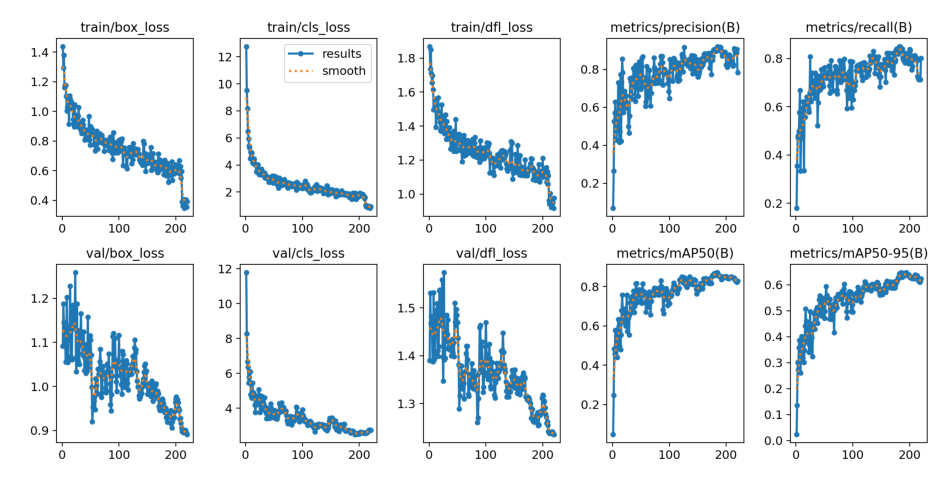

In [24]:
import matplotlib.pyplot as plt

res = '/kaggle/working/yolo/v8s/results.png'

plt.figure(figsize=(12, 8))
img=plt.imread(res)
plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
import pandas as pd

path = '/kaggle/working/yolo/v8s/results.csv'

results_df = pd.read_csv(path)
map_sc = results_df['metrics/mAP50(B)'].iloc[-1]
precision_sc = results_df['metrics/precision(B)'].values[-1]
recall_sc = results_df['metrics/recall(B)'].values[-1]

print(map_sc)
print(precision_sc)
print(recall_sc)

0.82724
0.78232
0.80119


In [10]:
pt = '/kaggle/working/yolo/v8s/weights/best.pt'
model = YOLO(pt)

results = model.predict(
    source='/kaggle/input/kitchen-test-data/gettyimages-852781628-640_adpp.mp4',
    conf=0.2, 
    save=True 
)
# print(results)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/352) /kaggle/input/kitchen-test-data/gettyimages-852781628-640_adpp.mp4: 384x640 1 cup, 1 grinder, 43.5ms
video 1/1 (frame 2/352) /kaggle/input/kitchen-test-data/gettyimages-852781628-640_adpp.mp4: 384x640 1 cup, 1 grinder, 10.7ms
video 1/1 (frame 3/352) /kaggle/input/kitchen-test-data/gettyimages-852781628-640_adpp.mp4: 384x640 1 cup, 1 grinder, 10.7ms
video 1/1 (frame 4/352) /kaggle/input/kitchen-test-data/gettyimages-852781628-640

In [ ]:
# import matplotlib.pyplot as plt

# pred = '/kaggle/working/runs/detect/predict/t8.jpg'
# plt.figure(figsize=(12, 8))
# img=plt.imread(pred)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [26]:
# import shutil

# def zip_folder(folder_path, output_zip="trained_yolo.zip"):
#     shutil.make_archive(base_name=output_zip.replace(".zip", ""), format='zip', root_dir=folder_path)
#     print(f"Zipped folder '{folder_path}' as '{output_zip}'")

# zip_folder('/kaggle/working/yolo/v8s')

Zipped folder '/kaggle/working/yolo/v8s' as 'trained_yolo.zip'
